    
# Frequentist Paradigm
You're not sure of it's the loaded coin or if it's just a fair one. So he gives you a chance to flip it five times and just check it out. You flip it five times and you get two heads and three tails. And now you have a decision point to make. Which coin do you think it is and how sure are you about that? 

So in order to perform inference, we need to define a likelihood. In this case, we'll start by defining the unknown parameter $\theta$, and this is either that the coin is fair or it's a loaded coin.

So our unknown parameters, which coin it is. Is it a fair coin or is it the loaded coin? 

Our data are going to be 5 flips of this coin, so the binomial of 5 flips and the question is what's that probability? 

So we can write a likelihood,  $$f(x|\theta)= \begin{equation}
  f(x)=\begin{cases}
    {5 \choose x} \dfrac{1}{2}^{5}, & \text{if $\theta = fair$}.\\
    {x \choose 5} (0.7)^{x}(0.3)^{5-x}, & \text{if $\theta = loaded$}.
  \end{cases}
\end{equation}$$

$$={5 \choose x} \dfrac{1}{2}^{5} I_{\{\theta = fair\}} + {x \choose 5} (0.7)^{x}(0.3)^{5-x}  I_{\{\theta = loaded\}}$$

## Example
Let's assume that $X = 2$:
        $$L(\theta|X = 2) = \begin{cases} 0.3122 & \text{if $\theta = fair$}.\\ 0.1323 & \text{if $\theta = loaded$}. \end{cases} $$

 So we see that having observed two heads, the likelihood is higher for theta equals fair than for theta equals loaded. 
 We can say that the MLE ($\hat{\theta}$) is that it is a fair coin.
 
**How sure are you?**

This is not a question that's easily answered in the frequentist paradigm. Another question is that we might like to know what is the probability that theta equals fair, given, we observed two heads. 

In the frequentist paradigm, the coin is a physical quantity. It's a fixed coin, and therefore it has a fixed probability of coming up heads. It either is the fair coin, or it's the loaded coin. 

In this case, the probability is fair given x=2 is just a probability that's fair because it's a fixed coin. And this probability is either 0 or 1. This is not a particularly satisfying answer. As a result, Let’s take a look at how we solve this problem under Bayesian inference and see what type of answer we get there. 


# Bayes' Theorem

Bayes' theorem describes the probability of an event, based on prior knowledge of conditions that might be related to the event. It is the theoretical underpinning of most of what we do within the Bayesian statistical framework.

## Conditional probability
Conditional probability is when we're trying to consider two events that are related to each other. So we can ask, what is the probability of event A given that we know event B happened? This is defined as the probability that both events A and B happened divided by the probability that event B happens. $$P(A \mid B) = \dfrac{P(A \cap B)}{P(B)}$$

* In case events $A$ and $B$ are independent, $P(A \mid B) = P(A)$ and $P(A \cap B) = P(A)P(B)$

## Bayes' Theorem for discrete distributions
Bayes' Theorem is used to reverse the direction of conditioning. Suppose we want to ask what's the $P(A \mid B)$ but we know it in terms of $P(B \mid A)$. So we can write : $$P(A \mid B) = \dfrac{P(B \mid A) P(A)}{P(B/A) P(A) + P(B \mid A^C) P(A^C)}$$ This does work out back to be the same as : $$\dfrac{P(A \cap B)}{P(B)}$$. 

When there are multiple possible outcomes, $A_1, \dots, A_n$ (exactly one of the A_i ’s must occur, the A_i ’s are mutually exclusive and $\sum_{i=1}^{m} = 1$) then we can write Bayes' Theorem as: $$P(A_i \mid B) = \dfrac{P(B \mid A_i) P(A_i)}{\sum_i^m P(B \mid A_i) P(A_i)}$$

Exaple: 
The probability of someone being positive to a specific test of HIV given that he is infected by the virus is 97,7%. The probability of someone being negative to the same test while he is not affected by the virus is 92,6%. The probability of someone having HIV is 0.26%. What is the probability of someone being having the virus given that his test is positive? 

Is it a good test?


In [1]:
p_p_h = 0.977 # prob(+|HIV)
p_n_nh = 0.926 # prob(-|noHIV)
p_p = 0.0026 # prob(positive)
p_n = 1- p_p # prob(negative)
p_p_nh = 1 - p_p_h  # prob(+|noHIV)
p_h_p = (p_p_h * p_p)/(p_p_h * p_p + p_p_nh * p_n) # prob(HIV|+)
print(p_h_p)

0.09969231252256629


## Bayes' Theorem for continuous distributions

When dealing with a continuous random variable $\theta$, we can write the conditional density for $\theta$ given $y$ as:
$$ f(\theta|y) = \dfrac{f(y|\theta)f(\theta)}{\int f(y|\theta)f(\theta)d\theta}$$

All we are doing is integrating over all possible values of $\theta$, in the denominator rather than take the sum over these values. It does the same thing as the Bayes' Theorem shown at the previous section.

# Bayesian Paradigm

An advantage of the Bayesian approach is that it allows you to easily incorporate prior information, when you know something in advance of the looking at the data. This is difficult to do under the Frequentist paradigm. 

In this case, we're talking about your brother. You probably know him pretty well. Because you've been around him a bunch, and this isn't the first time he's come to you with a coin, you may have some information on this that you want to incorporate into the problem. So suppose you think that before you've looked at the coin, there's a 60% probability that your brother is using a loaded coin. ($P(\theta = loaded) = 0.6$)
Notice that $\theta$ can take only 2 values, fair or loaded.

$$f(\theta | x ) = \dfrac{f(x| \theta) \times f(\theta)}{\sum_{\theta} f(x | \theta)} \times f(\theta)$$
$$= \dfrac{{5 \choose x}[{1 \choose 2}^{5}(0.4)I_{\{\theta = fair\}} + (0.7)^{x}(0.3)^{5-x}(0.6)I_{\{\theta = loaded \}}]}{{5 \choose x}[{1 \choose 2}^{5}0.4 + (0.7)^{5}(0.3)^{5-x}(0.6)]}$$
$$f(\theta | x = 2) = \dfrac{0.0125 I_{\{ \theta = fair \}} + 0.0079 I_{\{ \theta = loaded \}}}{0.0125 + 0.0079}$$
$$ = 0.612 I_{\{\theta = fail \}} + 0.388 I_{\{\theta = loaded \}}$$

So, what we get is: 
$$P(\theta = loaded | X = 2) = 0.388$$


What if you have no idea ($P(\theta = loaded) = 0.5$) about your brother behavior? 

Using the formula we used before we come up with $P(\theta = loaded | X = 2) = 0.297$.

What if we know our brother too well and he is a scum ($P(\theta = loaded) = 0.9$)? 

The probability is $P(\theta = loaded | X = 2) = 0.792$

In this case, the Bayesian approach is inherently subjective. It represents your own personal perspective, and this is an important part of the paradigm. If you have a different perspective, you will get different answers, and that's okay. It's all done in a mathematically vigorous framework, and it's all mathematically consistent and coherent. 

**Under the Frequentist paradigm, we can't get a good answer for what is the probability the coin is loaded. The machinery just is not set up that way. **

Under the Bayesian paradigm, we're explicit that this is a subjective and personal approach. But we can also be explicit about what all of our assumptions are, and then see how our answers depend on our assumptions. 

# Posterior Intervals 

Let's take a look at plotting the prior and the posterior.

So plotting the prior density. Let $\theta \sim U[0,1]$

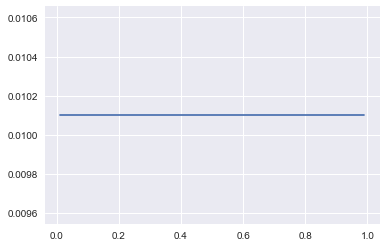

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

theta = pd.Series(np.arange(0.01, 1, 0.01))

def f(x):
    return [1/len(x) for i in range(len(x))]

plt.plot(theta, f(theta))
plt.show()

The posterior for the uniform distribution is calculated as follows: 
$$ f(\theta | Y = 1) = \dfrac{ \theta (1 - \theta)^{0} I_{\{0 \leq \theta \leq 1 \}}}{\int_{- \infty }^{+ \infty } \theta^{1}(1 - \theta)^{0}I_{\{0 \leq \theta \leq 1 \}}}d\theta = \dfrac{\theta I_{\{0 \leq \theta \leq 1 \}}}{\int_{0}^{1}\theta} = 2\theta I_{\{0 \leq \theta \leq 1 \}} = 2\theta I_{\{0 \leq \theta \leq 1 \}}$$


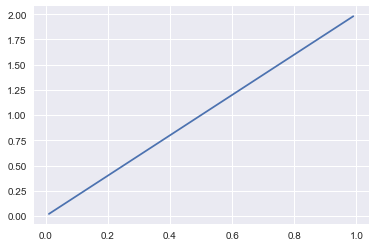

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

theta = pd.Series(np.arange(0.01, 1, 0.01))

def f(x): return 2 * x
plt.plot(theta, f(theta))
plt.show()

In [ ]:
# Prior interval estimates for p(0.025 <= x <= 0.975)
punif(0.95, min = 0, max = 1, lower.tail = TRUE, log.p = FALSE) 
# P(X > 0.05)
punif(0.05, min = 0, max = 1, lower.tail = FALSE, log.p = FALSE) 

# A cool way to print out results is:

p_0.025_0.975 <- punif(0.95, min = 0, max = 1, lower.tail = TRUE, log.p = FALSE) 
print(paste("p(0.025 <= x <= 0.975) =", p_0.025_0.975))

p_0.05 <- punif(0.05, min = 0, max = 1, lower.tail = FALSE, log.p = FALSE) 
print(paste("p(x > 0.05) =", p_0.05))